## dataset information 
 - lsoa_code:  code for Lower Super Output Area in Greater London <br> 
 - borough: Common name for London borough<br> 
 - major_category: High level categorization of crime<br> 
 - minor_category: Low level categorization of crime within major category<br> 
 - value: monthly reported count of categorical crime in given borough<br> 
 - year: Year of reported counts, 2008-2016<br> 
 - month: Month of reported counts, 1-12

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sys
import os
import geopandas as gpd

In [15]:
crime_rate = pd.read_csv('datasets/london_crime_by_lsoa.csv')

## Basic information

In [45]:
print('first five rows of the dataset : ')
crime_rate.head()

first five rows of the dataset : 


,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


In [21]:
print('number of rows : ', crime_rate.shape[0])
print('number of columns : ', crime_rate.shape[1])

number of rows :  13490604
number of columns :  7


In [25]:
print("data type : ")
crime_rate.dtypes

data type : 


lsoa_code         object
borough           object
major_category    object
minor_category    object
value              int64
year               int64
month              int64
dtype: object

## From 2011 to 2016

In [30]:
crime_rate = crime_rate[crime_rate.year != (2008 or 2009 or 2010)]  #delete data from 2008 to 2010

## Missing data

In [31]:
crime_rate.isnull().values.any()   #check if there is missing values in the dataset

False

## Delete data where 'value' is zero

In [35]:
crime_rate = crime_rate[crime_rate.value != 0] #delete rows where 'value' is 0
crime_rate.shape

(3027857, 7)

## Total number of crimes in each borough

In [105]:
borough_list = crime_rate.borough.unique()  #names of all boroughs
borough_sum = pd.Series(index = borough_list, dtype = int)    #totoal number of crimes in each borough
for i in borough_list:
    temp = crime_rate[crime_rate.borough == i]
    borough_sum[i] = temp.value.sum()
borough_sum = borough_sum.sort_values(ascending = False)

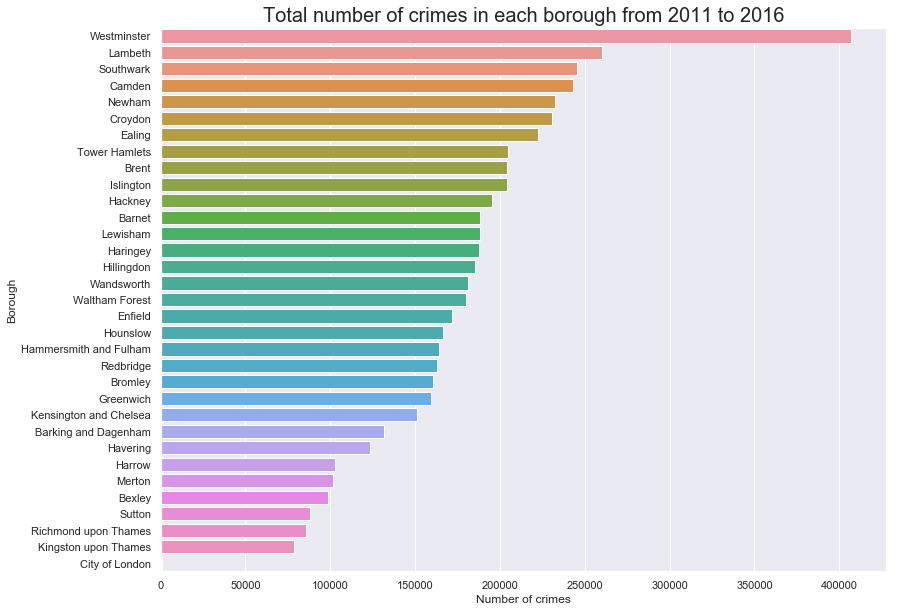

In [116]:
sns.set(rc={'figure.figsize':(13,10)})
ax = sns.barplot(y = borough_sum.index, x = borough_sum.values)
ax.set_title('Total number of crimes in each borough from 2011 to 2016', fontsize = 20)
ax.set_xlabel('Number of crimes')
ax.set_ylabel('Borough')
plt.savefig('crime_rate_by_borough.png', bbox_inches = 'tight')
plt.show()

In [207]:
borough_sum

Westminster               407182
Lambeth                   260461
Southwark                 245339
Camden                    243137
Newham                    232272
Croydon                   230778
Ealing                    222615
Tower Hamlets             205035
Brent                     204047
Islington                 204013
Hackney                   195115
Barnet                    188247
Lewisham                  188083
Haringey                  187548
Hillingdon                185362
Wandsworth                181411
Waltham Forest            179799
Enfield                   171900
Hounslow                  166568
Hammersmith and Fulham    164145
Redbridge                 162689
Bromley                   160334
Greenwich                 159558
Kensington and Chelsea    151318
Barking and Dagenham      131791
Havering                  123552
Harrow                    103074
Merton                    101779
Bexley                     98831
Sutton                     88044
Richmond u

## Map  (haven't decided what to show on the map)

In [157]:
map_image = gpd.read_file('datasets/ESRI/London_Borough_Excluding_MHW.shp')

In [158]:
map_image.head()

,NAME,GSS_CODE,HECTARES,NONLD_AREA,ONS_INNER,SUB_2009,SUB_2006,geometry
0,Kingston upon Thames,E09000021,3726.117,0.000,F,None,None,"POLYGON ((516401.6 160201.8, 516407.3 160210.5..."
1,Croydon,E09000008,8649.441,0.000,F,None,None,"POLYGON ((535009.2 159504.7, 535005.5 159502, ..."
2,Bromley,E09000006,15013.487,0.000,F,None,None,"POLYGON ((540373.6 157530.4, 540361.2 157551.9..."
3,Hounslow,E09000018,5658.541,60.755,F,None,None,"POLYGON ((521975.8 178100, 521967.7 178096.8, ..."
4,Ealing,E09000009,5554.428,0.000,F,None,None,"POLYGON ((510253.5 182881.6, 510249.9 182886, ..."


In [168]:
map_image['num'] = 0
for i in range(33):
    map_image.loc[i , 'num'] = borough_sum[map_image.loc[i, 'NAME']]

In [169]:
map_image.head()

,NAME,GSS_CODE,HECTARES,NONLD_AREA,ONS_INNER,SUB_2009,SUB_2006,geometry,num
0,Kingston upon Thames,E09000021,3726.117,0.000,F,None,None,"POLYGON ((516401.6 160201.8, 516407.3 160210.5...",78645
1,Croydon,E09000008,8649.441,0.000,F,None,None,"POLYGON ((535009.2 159504.7, 535005.5 159502, ...",230778
2,Bromley,E09000006,15013.487,0.000,F,None,None,"POLYGON ((540373.6 157530.4, 540361.2 157551.9...",160334
3,Hounslow,E09000018,5658.541,60.755,F,None,None,"POLYGON ((521975.8 178100, 521967.7 178096.8, ...",166568
4,Ealing,E09000009,5554.428,0.000,F,None,None,"POLYGON ((510253.5 182881.6, 510249.9 182886, ...",222615


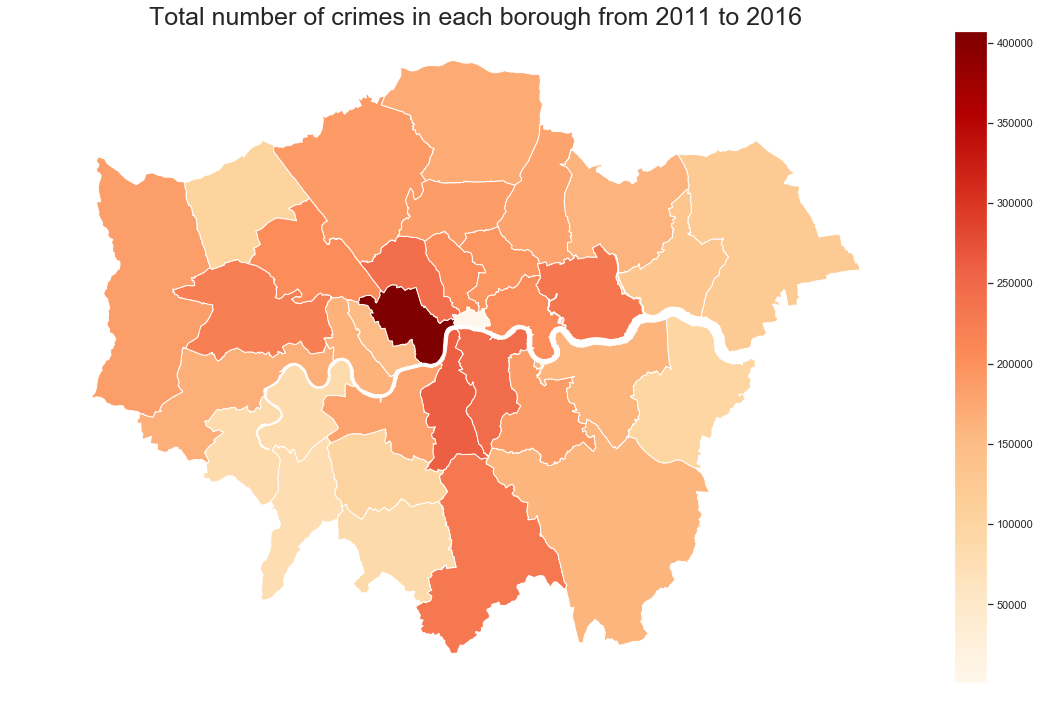

In [206]:
fig, ax = plt.subplots(1, figsize=(20,12))
map_image.plot(column = 'num', cmap='OrRd',ax = ax, legend=True)
ax.axis('off')
ax.set_title('Total number of crimes in each borough from 2011 to 2016', fontsize = 25)
plt.show()